# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1Zu6fPIsWkIAl3gHlRse527SQEwQHB8Oh?usp=sharing)

https://wikidocs.net/37001

06-08 벡터와 행렬 연산

앞서 독립 변수 x
가 2개 이상인 선형 회귀와 로지스틱 회귀에 대해서 배웠습니다. 그런데 다음 실습인 소프트맥스 회귀에서는 종속 변수 y
의 종류도 3개 이상이 되면서 더욱 복잡해집니다. 그리고 이러한 식들이 겹겹이 누적되면 인공 신경망의 개념이 됩니다.

케라스는 사용하기가 편리해서 이런 고민을 할 일이 상대적으로 적지만, Numpy나 텐서플로우의 로우-레벨(low-level)의 머신 러닝 개발을 하게되면 각 변수들의 연산을 벡터와 행렬 연산으로 이해할 수 있어야 합니다. 다시 말해 사용자가 데이터와 변수의 개수로부터 행렬의 크기, 더 나아가 텐서의 크기를 산정할 수 있어야 합니다. 기본적인 벡터와 행렬 연산에 대해서 이해해보겠습니다.

1. 벡터와 행렬과 텐서

벡터는 크기와 방향을 가진 양입니다. 숫자가 나열된 형상이며 파이썬에서는 1차원 배열 또는 리스트로 표현합니다. 반면, 행렬은 행과 열을 가지는 2차원 형상을 가진 구조입니다. 파이썬에서는 2차원 배열로 표현합니다. 가로줄을 행(row)라고 하며, 세로줄을 열(column)이라고 합니다. 3차원부터는 주로 텐서라고 부릅니다. 텐서는 파이썬에서는 3차원 이상의 배열로 표현합니다.

2. 텐서(Tensor)

인공 신경망은 복잡한 모델 내의 연산을 주로 행렬 연산을 통해 해결합니다. 그런데 여기서 말하는 행렬 연산이란 단순히 2차원 배열을 통한 행렬 연산만을 의미하는 것이 아닙니다. 머신 러닝의 입, 출력이 복잡해지면 3차원 텐서에 대한 이해가 필수로 요구됩니다. 예를 들어 인공 신경망 모델 중 하나인 RNN에서는 3차원 텐서에 대한 개념 이해 없이는 이해하기가 쉽지 않습니다.

In [1]:
import numpy as np

1) 0차원 텐서(스칼라)

스칼라는 하나의 실수값으로 이루어진 데이터를 말합니다. 이를 0차원 텐서라고 합니다. 차원을 영어로 Dimension이라고 하므로 0D 텐서라고도 합니다.

In [2]:
d = np.array(5)
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


Numpy의 ndim을 출력했을 때 나오는 값에 주목합시다. ndim을 출력했을 때 나오는 값을 우리는 축(axis)의 개수 또는 텐서의 차원이라고 부릅니다. 반드시 이 두 용어를 기억해둡시다.

2) 1차원 텐서(벡터)

숫자를 배열한 것을 벡터라고합니다. 벡터는 1차원 텐서입니다. 주의할 점은 벡터에서도 차원이라는 용어를 쓰는데, 벡터의 차원과 텐서의 차원은 다른 개념이라는 점입니다. 아래의 예제는 4차원 벡터이지만, 1차원 텐서입니다. 1D 텐서라고도 합니다.

In [3]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


벡터의 차원과 텐서의 차원의 정의로 인해 혼동할 수 있는데 벡터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미하는 것이고, 텐서에서의 차원은 축의 개수를 의미합니다.

3) 2차원 텐서(행렬)

행과 열이 존재하는 벡터의 배열. 즉, 행렬(matrix)을 2차원 텐서라고 합니다. 2D 텐서라고도 합니다.

In [4]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


텐서의 크기(shape)에 대해서도 정리합시다. 텐서의 크기란, 각 축을 따라서 얼마나 많은 차원이 있는지를 나타낸 값입니다. 텐서의 크기를 바로 머릿속으로 떠올릴 수 있으면 모델 설계 시에 유용합니다. 처음에는 어려울 수도 있는데, 순차적으로 확장해나가며 생각하는 것도 방법입니다. 위의 경우 3개의 커다란 데이터가 있는데 그 각각의 커다란 데이터는 작은 데이터 4개로 이루어졌다고 생각할 수 있습니다.

4) 3차원 텐서(다차원 배열)

행렬 또는 2차원 텐서를 단위로 한 번 더 배열하면 3차원 텐서라고 부릅니다. 3D 텐서라고도 합니다. 사실 위에서 언급한 0차원 ~ 2차원 텐서는 각각 스칼라, 벡터, 행렬이라고 해도 무방하므로 3차원 이상의 텐서부터 본격적으로 텐서라고 부릅니다. 데이터 사이언스 분야 한정으로 주로 3차원 이상의 배열을 텐서라고 부른다고 이해해도 좋습니다. 3D 텐서는 적어도 여기서는 3차원 배열로 이해하면 되겠습니다. 이 3차원 텐서의 구조를 이해하지 않으면, 복잡한 인공 신경망의 입, 출력값을 이해하는 것이 쉽지 않습니다. 개념 자체는 어렵지 않지만 반드시 알아야하는 개념입니다.

In [5]:
d = np.array([
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
    [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
    ])

In [6]:
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


자연어 처리에서 특히 자주 보게 되는 것이 이 3D 텐서입니다. 3D 텐서는 시퀀스 데이터(sequence data)를 표현할 때 자주 사용되기 때문입니다. 여기서 시퀀스 데이터는 주로 단어의 시퀀스를 의미하며, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있습니다. 이 경우 3D 텐서는 (samples, timesteps, word_dim)이 됩니다. 또는 일괄로 처리하기 위해 데이터를 묶는 단위인 배치의 개념에 대해서 뒤에서 배울텐데 (batch_size, timesteps, word_dim)이라고도 볼 수 있습니다.

samples 또는 batch_size는 샘플의 개수, timesteps는 시퀀스의 길이, word_dim은 단어를 표현하는 벡터의 차원을 의미합니다. 더 상세한 설명은 RNN 챕터에서 배우게 되겠지만 자연어 처리에서 왜 3D 텐서의 개념이 사용되는지 간단한 예를 들어봅시다. 다음과 같은 3개의 훈련 데이터가 있다고 해봅시다.

문서1 : I like NLP\
문서2 : I like DL\
문서3 : DL is AI

이를 인공 신경망의 모델의 입력으로 사용하기 위해서는 각 단어를 벡터화해야 합니다. 단어를 벡터화하는 방법으로는 원-핫 인코딩이나 워드 임베딩이라는 방법이 대표적입니다. 워드 임베딩은 아직 배우지 않았으므로 원-핫 인코딩으로 각 단어를 벡터화 해보겠습니다.

단어	One-hot vector
I	[1 0 0 0 0 0]
like	[0 1 0 0 0 0]
NLP	[0 0 1 0 0 0]
DL	[0 0 0 1 0 0]
is	[0 0 0 0 1 0]
AI	[0 0 0 0 0 1]

훈련 데이터의 단어들을 모두 원-핫 벡터로 바꿔서 인공 신경망의 입력으로 한 꺼번에 사용한다고 하면 다음과 같습니다. 이렇게 훈련 데이터를 다수 묶어 입력으로 사용하는 것을 딥 러닝에서는 배치(Batch)라고 합니다.

[[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],  
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],  
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]]  

이는 (3, 3, 6)의 크기를 가지는 3D 텐서입니다.

5) 그 이상의 텐서

3차원 텐서를 배열로 합치면 4차원 텐서가 됩니다. 4차원 텐서를 배열로 합치면 5차원 텐서가 됩니다. 이렇게 텐서는 다차원 배열로서 계속해서 확장될 수 있습니다.



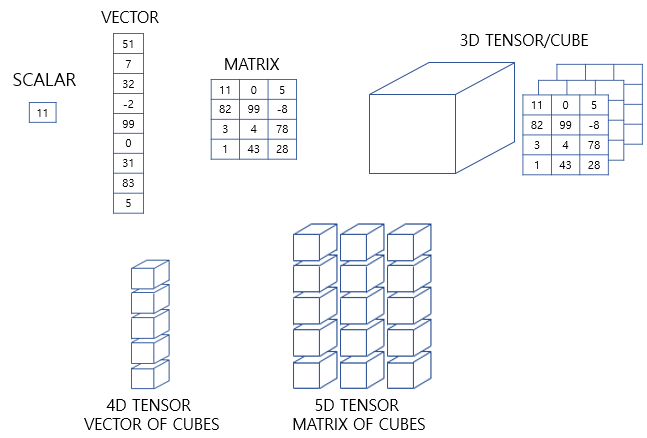

6) 케라스에서의 텐서

앞서 Numpy로 각 텐서의 ndim(차원)과 shape(크기)를 출력했었습니다. 예를 들어 위의 예제에서는 3차원 텐서의 크기(shape)는 (2, 3, 5)였습니다. 케라스에서는 신경망의 층에 입력의 크기(shape)를 인자로 줄 때 input_shape라는 인자를 사용합니다.

실제 예시는 뒤 챕터들에서 보겠지만 input_shape는 배치 크기를 제외하고 차원을 지정하는데, 예를 들어 input_shape(6, 5)라는 인자값을 사용한다면 이 텐서의 크기는 (?, 6, 5)을 의미합니다. 배치 크기는 지정해주기 전까지는 알 수 없기때문에 ?가 됩니다. 만약 배치 크기까지 지정해주고 싶다면 batch_input_shape=(8, 2, 10)와 같이 인자를 주면 이 텐서의 크기는 (8, 2, 10)을 의미합니다.

그 외에도 입력의 속성 수를 의미하는 input_dim, 시퀀스 데이터의 길이를 의미하는 input_length 등의 인자도 사용하는데, input_shape의 두 개의 인자는 (input_length, input_dim)입니다.

3. 벡터와 행렬의 연산

벡터와 행렬의 기본적인 연산에 대해서 알아보겠습니다.

In [7]:
import numpy as np


1) 벡터와 행렬의 덧셈과 뺄셈

같은 크기의 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있습니다. 이 경우 같은 위치의 원소끼리 연산하면 됩니다. 이러한 연산을 요소별(element-wise) 연산이라고 합니다. 다음과 같이 A와 B라는 두 개의 벡터가 있다고 해봅시다.

이때 두 벡터 A와 B의 덧셈과 뺄셈은 아래와 같습니다.

In [8]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :', A+B)
print('두 벡터의 차 :', A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [9]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8], [1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


2) 벡터의 내적과 행렬의 곱셈

벡터의 점곱(dot product) 또는 내적(inner product)에 대해 알아봅시다. 벡터의 내적은 연산을 점(dot)으로 표현하여 a \cdot b
와 같이 표현하기도 합니다.

내적이 성립하기 위해서는 두 벡터의 차원이 같아야 하며, 두 벡터 중 앞의 벡터가 행벡터(가로 방향 벡터)이고 뒤의 벡터가 열벡터(세로 방향 벡터)여야 합니다. 아래는 두 벡터의 차원이 같고 곱셈의 대상이 각각 행벡터이고 열벡터일 때 내적이 이루어지는 모습을 보여줍니다. 벡터의 내적의 결과는 스칼라가 된다는 특징이 있습니다.

A \cdot B =
\left[
    \begin{array}{c}
      1\ 2\ 3
    \end{array}
  \right]
\left[
    \begin{array}{c}
      4 \\
      5 \\
      6 \\
    \end{array}
  \right]
= 1 × 4 + 2 × 5 + 3 × 6 = 32\text{(스칼라)}

In [10]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :', np.dot(A,B))

두 벡터의 내적 : 32


행렬의 곱셈을 이해하기 위해서는 벡터의 내적을 이해해야 합니다. 행렬의 곱셈은 왼쪽 행렬의 행벡터(가로 방향 벡터)와 오른쪽 행렬의 열벡터(세로 방향 벡터)의 내적(대응하는 원소들의 곱의 합)이 결과 행렬의 원소가 되는 것으로 이루어집니다. 다음과 같이 A와 B라는 두 개의 행렬이 있다고 하였을 때, 두 행렬 A와 B의 행렬의 곱셈은 아래와 같습니다.

In [11]:
A = np.array([[1, 3], [2, 4]])
B = np.array([[5, 7], [6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


행렬의 곱셈은 딥 러닝을 이해하기 위해 필수적인 개념이므로 반드시 숙지해야 합니다. 행렬 곱셈에서의 주요한 두 가지 조건 또한 반드시 기억해둡시다.

두 행렬의 곱 A × B이 성립되기 위해서는 행렬 A의 열의 개수와 행렬 B의 행의 개수는 같아야 한다.
두 행렬의 곱 A × B의 결과로 나온 행렬 AB의 크기는 A의 행의 개수와 B의 열의 개수를 가진다.
벡터와 행렬의 곱 또는 행렬과 벡터의 곱 또한 행렬의 곱셈과 동일한 원리로 이루어집니다.

4. 다중 선형 회귀 행렬 연산으로 이해하기

독립 변수가 2개 이상일 때, 1개의 종속 변수를 예측하는 문제를 행렬의 연산으로 표현한다면 어떻게 될까요? 다중 선형 회귀나 다중 로지스틱 회귀가 이러한 연산의 예인데, 여기서는 다중 선형 회귀를 통해 예를 들어보겠습니다. 다음은 독립 변수 x
가 n개인 다중 선형 회귀 수식입니다.

y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b

샘플의 개수가 많을 경우에는 행렬의 곱셈으로 표현이 가능합니다. 다음은 집의 크기, 방의 수, 층의 수, 집이 얼마나 오래되었는지와 집의 가격이 기록된 부동산 데이터라고 가정합시다. 해당 데이터를 학습하여 새로운 집의 정보가 들어왔을 때, 집의 가격을 예측하는 모델을 구현한다고 해봅시다.

size(
)(
)	number of bedrooms(
)	number of floors(
)	age of home(
)	price($1000)(y)
1800	2	1	10	207
1200	4	2	20	176
1700	3	2	15	213
1500	5	1	10	234
1100	2	2	10	155

위 데이터에 대해서 입력 행렬
와 가중치 벡터
의 곱으로 표현하면 다음과 같습니다.





여기에 편향 벡터
를 더 해주면 위 데이터에 대한 전체 가설 수식
를 표현할 수 있습니다.

5. 샘플(Sample)과 특성(Feature)

훈련 데이터의 입력 행렬을 X
라고 하였을 때 샘플(Sample)과 특성(Feature)의 정의는 다음과 같습니다.

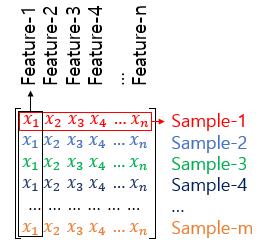

머신 러닝에서는 데이터를 셀 수 있는 단위로 구분할 때, 각각을 샘플이라고 부르며, 종속 변수 y
를 예측하기 위한 각각의 독립 변수 x
를 특성이라고 부릅니다.

6. 가중치와 편향 행렬의 크기 결정

앞서 언급하였던 행렬 곱셈의 두 가지 주요한 조건을 기억해둡시다.

두 행렬의 곱 J × K이 성립되기 위해서는 행렬 J의 열의 개수와 행렬 K의 행의 개수는 같아야 한다.
두 행렬의 곱 J × K의 결과로 나온 행렬 JK의 크기는 J의 행의 개수와 K의 열의 개수를 가진다.
이로부터 입력과 출력의 행렬의 크기로부터 가중치 행렬 W와 편향 행렬 B의 크기를 찾아낼 수 있습니다. 독립 변수 행렬을 X, 종속 변수 행렬을 Y라고 하였을 때, 이때 행렬 X를 입력 행렬(Input Matrix), Y를 출력 행렬(Output Matrix)이라고 합시다.

두 행렬의 곱의 결과로서 나온 행렬의 열의 크기는 행렬의 곱셈에서 뒤에 있는 행렬의 열의 크기와 동일합니다. 그러므로 출력 행렬 Y로부터 W행렬의 열의 크기가 결정됩니다. 입력 행렬과 출력 행렬의 크기로부터 가중치 행렬과 편향 행렬의 크기를 추정할 수 있다면, 딥 러닝 모델을 구현하였을 때 해당 모델에 존재하는 총 매개변수의 개수를 계산하기 쉽습니다. 어떤 딥 러닝 모델의 총 매개변수의 개수는 해당 모델에 존재하는 가중치 행렬과 편향 행렬의 모든 원소의 수이기 때문입니다.